#**Proyecto de Inteligencia Artificial - Introducción a la Inteligencia Artificial**

## Clasificación de tipos de email de SPAM (no Ham) y no SPAM (Ham)

Integrantes: Manuela Gutiérrez Cano, Daniel Esteban Maya Portillo, Nilson Suárez Hernández



<a href="https://githubtocolab.com/EstebanMa12/IA/blob/main/01%20-%20Classifying_Spambase_Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **1. Preprocesado y limpieza de los datos**

En la primera etapa del proceso de la tarea de clasificación de los correos deseados y no deseados, es decir, ham y no ham, respectivamente, es necesario preprocesar y limpiar los datos a fin de que estos estén en las condiciones ideales o necesarias para que los modelos de Machine Learning puedan realizar predicciones correctas sobre este tema.

1. Se cargan los datos, cuya fuente es https://www.kaggle.com/datasets/colormap/spambase, disponible en la página oficial de *Kaggle*.

2. Se debe cumplir con las condiciones de la base de datos que son:

* Al menos 5000 instancias o muestras.
* Al menos 30 características.
* Al menos el 10% de las caracteristicas han de ser categoricas. 
* Al menos el 5% de datos faltantes en al menos 3 columnas.

Para ello, la base de datos que tenemos tiene 4601 muestras, 58 características y ninguna variable categorica, entonces se decide generar más muestras y así también poder conseguir el porcentaje necesario de datos faltantes.



In [87]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**NOTA:** Antes de ejecutar la siguiente celda es necesario tener el archivo .json que contiene las credenciales de usuario de Kaggle, esto con el fin de poder descargar los datos desde Kaggle. Para obtener este archivo seguir los siguientes pasos:
1. Ir a la página de Kaggle, autenticarse e ir al perfil.
2. Seleccionar la pestaña Account.
3. Dar click en el botón Create New API Token y abrir el archivo, allí aparecerán los datos username y key.  

In [88]:
# Ejecutar una sola vez
import opendatasets as od
dataset = "https://www.kaggle.com/datasets/colormap/spambase"
od.download(dataset)

Skipping, found downloaded files in "./spambase" (use force=True to force download)


In [89]:
import os
data_dir = './spambase'
os.listdir(data_dir)

['spambase.csv']

In [90]:
datos = pd.read_csv('/content/spambase/spambase.csv')
datos

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [91]:
datos.shape

(4601, 58)

Categorización de las variables *char_freq_(, char_freq_[, char_freq_!, char_freq_$, char_freq_#*, dependiendo de los valores de cada columna

In [92]:
valores1 = [-math.inf,4.5,7.5,math.inf]       # valores columna char_freq_(    
valores2 = [-math.inf,1.5,3.5,math.inf]       # valores columna char_freq_[
valores3 = [-math.inf,13.5,25.5,math.inf]     # valores columna char_freq_!
valores4 = [-math.inf,3.5,5,math.inf]         # valores columna char_freq_$
valores5 = [-math.inf,4.5,8.5,math.inf]       # valores columna char_freq_#
categorias = ['Baja','Media','Alta']# Se refiere a baja, valores menores a 4.5 en el caso de valores1, media son los valores entre 4.5 y 7.5 y la alta son los valores más altos que 7.5
#Y así con las siguientes variables
datos['char_freq_('] = pd.cut(x=datos['char_freq_('],bins=valores1,labels=categorias)
datos['char_freq_['] = pd.cut(x=datos['char_freq_['],bins=valores2,labels=categorias)
datos['char_freq_!'] = pd.cut(x=datos['char_freq_!'],bins=valores3,labels=categorias)
datos['char_freq_$'] = pd.cut(x=datos['char_freq_$'],bins=valores4,labels=categorias)
datos['char_freq_#'] = pd.cut(x=datos['char_freq_#'],bins=valores5,labels=categorias)
datos

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,Baja,Baja,Baja,Baja,Baja,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,Baja,Baja,Baja,Baja,Baja,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,Baja,Baja,Baja,Baja,Baja,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,Baja,Baja,Baja,Baja,Baja,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,Baja,Baja,Baja,Baja,Baja,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,Baja,Baja,Baja,Baja,Baja,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,Baja,Baja,Baja,Baja,Baja,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,Baja,Baja,Baja,Baja,Baja,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,Baja,Baja,Baja,Baja,Baja,1.147,5,78,0


En la siguiente celda se crea un dataframe que permite completar el número de muestras requeridos y también permite que tenga datos faltantes.

In [93]:
index = []
data1 = []
for i in range(4601,5000):
  index.append(i)
data = np.zeros([len(index),57])
for j in range(data.shape[0]):
   data[j] = np.nan
df = pd.DataFrame(data=data,index=index)
for k in index:
  if k%2 == 0:
    data1.append(1)
  else:
    data1.append(0)
df1 = pd.DataFrame(data=data1,index=index)
df2 = pd.concat([df,df1],axis=1)
df2.columns = datos.columns
df2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Se concatenan los dos dataframes anteriores para obtener un sólo dataframe para preprocesarlo y limpiarlo, y se cumple con la condición de las variables categóricas. 

In [94]:
data = pd.concat([datos,df2],axis=0)
data['char_freq_('][data['char_freq_('].isna()] = np.random.choice(['Baja','Media','Alta'],1)[0]
data['char_freq_['][data['char_freq_['].isna()] = np.random.choice(['Baja','Media','Alta'],1)[0]
data['char_freq_!'][data['char_freq_!'].isna()] = np.random.choice(['Baja','Media','Alta'],1)[0]
data['char_freq_$'][data['char_freq_$'].isna()] = np.random.choice(['Baja','Media','Alta'],1)[0]
data['char_freq_#'][data['char_freq_#'].isna()] = np.random.choice(['Baja','Media','Alta'],1)[0]
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,Baja,Baja,Baja,Baja,Baja,3.756,61.0,278.0,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,Baja,Baja,Baja,Baja,Baja,5.114,101.0,1028.0,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,Baja,Baja,Baja,Baja,Baja,9.821,485.0,2259.0,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,Baja,Baja,Baja,Baja,Baja,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,Baja,Baja,Baja,Baja,Baja,3.537,40.0,191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Media,Media,Media,Baja,Media,NaN,NaN,NaN,0
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Media,Media,Media,Baja,Media,NaN,NaN,NaN,1
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Media,Media,Media,Baja,Media,NaN,NaN,NaN,0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Media,Media,Media,Baja,Media,NaN,NaN,NaN,1


## **1.2 Confirmación de las variables categóricas y númericas**##


In [95]:
## NUMERICAL VARIABLES
num=data._get_numeric_data().describe().T
num

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


In [96]:
num.shape

(53, 8)

In [97]:
## CATEGORICAL VARIABLES
ccols = [i for i in data.columns if not i in data._get_numeric_data()]
print(ccols)

['char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#']


In [98]:
for c in ccols:
  print('%10s'%c, np.unique(data[c].dropna()))

char_freq_( ['Alta' 'Baja' 'Media']
char_freq_[ ['Alta' 'Baja' 'Media']
char_freq_! ['Alta' 'Baja' 'Media']
char_freq_$ ['Alta' 'Baja' 'Media']
char_freq_# ['Alta' 'Baja' 'Media']


Antes de comenzar hacer el preprocesamient de los datos se definen las variables X, Y que corresponden al conjunto de datos y a las etiquetas o a las salidas.

In [99]:
X = data.iloc[:,0:57]   
Y = data.iloc[:,57]

Para empezar a realizar el preprocesamiento y la limpieza de los datos, primero se realiza la codificación OneHotEncoding de las variables con datos categóricos.

In [100]:
cf1_dummy = pd.get_dummies(X['char_freq_('],prefix='char_freq_(')
cf2_dummy = pd.get_dummies(X['char_freq_['],prefix='char_freq_[')
cf3_dummy = pd.get_dummies(X['char_freq_!'],prefix='char_freq_!')
cf4_dummy = pd.get_dummies(X['char_freq_$'],prefix='char_freq_$')
cf5_dummy = pd.get_dummies(X['char_freq_#'],prefix='char_freq_#')

X1 = pd.concat([X,cf1_dummy,cf2_dummy,cf3_dummy,cf4_dummy,cf5_dummy],axis=1).drop(['char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#'],axis=1)
X1

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_[_Alta,char_freq_!_Baja,char_freq_!_Media,char_freq_!_Alta,char_freq_$_Baja,char_freq_$_Media,char_freq_$_Alta,char_freq_#_Baja,char_freq_#_Media,char_freq_#_Alta
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,1,0,0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0,1,0,0,1,0,0,1,0,0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0,1,0,0,1,0,0,1,0,0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0,1,0,0,1,0,0,1,0,0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1,0,0,0,1,0
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1,0,0,0,1,0
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1,0,0,0,1,0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1,0,0,0,1,0


Luego, se realiza el reemplazo de los datos faltantes del conjunto de datos. Para ello se utiliza la ténica *KNNImputer* que es un método para reemplazar los valores faltantes usando los *K* vecinos más cercanos. Todos los valores faltantes de las muestras son imputados usando el valor medio de los vecinos más cercanos encontrados en el conjunto de entrenamiento. Dos muestras son cercanas si las características que no son faltantes están cercanas. 

In [101]:
from sklearn.impute import KNNImputer

imputador = KNNImputer(missing_values=np.nan,n_neighbors=5)
X2 = imputador.fit_transform(X1)
X2 = pd.DataFrame(X2)
X2.columns = X1.columns
X2

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_[_Alta,char_freq_!_Baja,char_freq_!_Media,char_freq_!_Alta,char_freq_$_Baja,char_freq_$_Media,char_freq_$_Alta,char_freq_#_Baja,char_freq_#_Media,char_freq_#_Alta
0,0.00,0.64,0.64,0.0,0.32,0.000,0.00,0.00,0.00,0.000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.21,0.28,0.50,0.0,0.14,0.280,0.21,0.07,0.00,0.940,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.06,0.00,0.71,0.0,1.23,0.190,0.19,0.12,0.64,0.250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.00,0.00,0.00,0.0,0.63,0.000,0.31,0.63,0.31,0.630,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.00,0.00,0.00,0.0,0.63,0.000,0.31,0.63,0.31,0.630,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.00,0.00,0.00,0.0,0.37,0.156,0.00,0.00,0.00,1.302,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4996,0.00,0.00,0.00,0.0,0.37,0.156,0.00,0.00,0.00,1.302,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4997,0.00,0.00,0.00,0.0,0.37,0.156,0.00,0.00,0.00,1.302,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4998,0.00,0.00,0.00,0.0,0.37,0.156,0.00,0.00,0.00,1.302,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [102]:
final_data = pd.concat([X2,Y],axis=1)
final_data          # conjunto de datos que contiene los datos preprocesados 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_!_Baja,char_freq_!_Media,char_freq_!_Alta,char_freq_$_Baja,char_freq_$_Media,char_freq_$_Alta,char_freq_#_Baja,char_freq_#_Media,char_freq_#_Alta,spam
0,0.00,0.64,0.64,0.0,0.32,0.000,0.00,0.00,0.00,0.000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
1,0.21,0.28,0.50,0.0,0.14,0.280,0.21,0.07,0.00,0.940,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.06,0.00,0.71,0.0,1.23,0.190,0.19,0.12,0.64,0.250,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,0.00,0.00,0.00,0.0,0.63,0.000,0.31,0.63,0.31,0.630,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,0.00,0.00,0.00,0.0,0.63,0.000,0.31,0.63,0.31,0.630,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.00,0.00,0.00,0.0,0.37,0.156,0.00,0.00,0.00,1.302,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4996,0.00,0.00,0.00,0.0,0.37,0.156,0.00,0.00,0.00,1.302,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4997,0.00,0.00,0.00,0.0,0.37,0.156,0.00,0.00,0.00,1.302,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4998,0.00,0.00,0.00,0.0,0.37,0.156,0.00,0.00,0.00,1.302,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


## **2. Exploración de los datos**
En esta parte se pretende saber cómo se comportan los datos, para ello se debe saber como es la distribución por clases, ya que es un problema de clasificación, cuál es el número de muestras y de características, si corresponde a un problema balanceado o desbalanceado de acuerdo con la distribución de clases de la variable de salida, entre otros aspectos relevantes. 

In [103]:
# número de muestras, característicasy clases
print('El número de muestras es:' , final_data.shape[0])
print('El número de características o variables es:', X2.shape[1])
print('El número de clases es:', len(np.unique(Y)))
print('Las clases son:', np.unique(Y))

El número de muestras es: 5000
El número de características o variables es: 67
El número de clases es: 2
Las clases son: [0 1]


In [104]:
def numero_muestras_por_clase(Y):
  diccionario = {}
  clases = np.unique(Y)
  for j in range(len(clases)):
    diccionario[clases[j]] = 0
  for i in range(len(Y)):
    for j in range(len(clases)):
      if Y[i] == clases[j]:
        diccionario[clases[j]] = diccionario[clases[j]] + 1

  return (diccionario)

In [105]:
numero_muestras_por_clase(Y)

{0: 2988, 1: 2012}

Como se evidencia en el diccionario anterior, existen dos clases para este problema que son la clase 0 y 1, es decir, no spam y spam, el tipo de correo. 

Se muestra que de la clase 0 hay 2988 muestras y de la clase 1 hay 2012 muestras, lo que evidencia que no hay un desbalance tan notorio entre las dos clases, ya que no hay una diferencia muy grande entre la cantidad de muestras y con esto, se puede decir que el problema es balanceado y se evita el problema de que la clase mayoritaria o la clase con mayor número de muestras se sesgue y evite que la clase minoritaria o de menor número de muestras sea o quede mal representada y por ende se puede decir que las predicciones que se hagan posteriormente utilizando los modelos de Machine Learning van arrojar predicciones más correctas.

Una represenación gráfica de la distribución de las muestras se muestra a continuación:

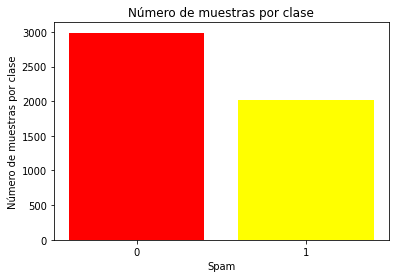

In [106]:
fig, ax = plt.subplots()
colores = ["red","yellow"]
ax.bar(numero_muestras_por_clase(Y).keys(), numero_muestras_por_clase(Y).values(), color = colores)
ax.set_title("Número de muestras por clase")
ax.set_xlabel("Spam")
ax.set_ylabel("Número de muestras por clase")
ax.set_xticks(list(numero_muestras_por_clase(Y).keys()))
plt.show()

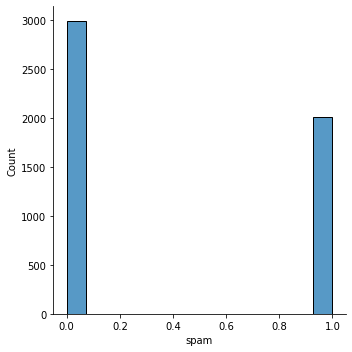

In [107]:
sns.displot(final_data['spam']);

Antes de iniciar con el entrenamiento de los modelos de apredizaje, es bueno analizar cuál es la mejor proporción del conjunto de entrenamiento de los datos respecto a la métrica de desempeño, accuracy, que es la métrica prinicipal de este problema de Machine Lerning. 

Para ello se va a realizar curvas de aprendizje o *Learning Curve* con algunos clasificadores, es un gráfica que permite visualizar el comportamiento del tamaño de un conjunto de entrenamiento específico con respecto a la métrica seleccionada. 



In [108]:
x, y = final_data.iloc[:,0:67], final_data.iloc[:,67]

In [109]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

**Curva de aprendizaje con el clasificador Random Forest**




In [110]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),x,y,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

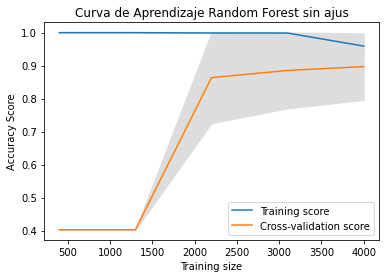

In [111]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje Random Forest sin ajus')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

**Curva de aprendizaje con el clasificador Máquina de Vectores de Soporte**

In [112]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(SVC(),x,y,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

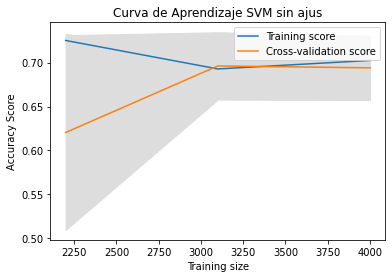

In [113]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje SVM sin ajus')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

**Curva de aprendizaje con el clasificador de Red Neuronal**

In [114]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(),x,y,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

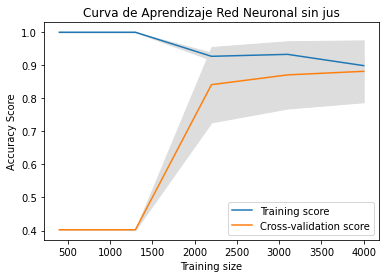

In [115]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje Red Neuronal sin jus')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

**Curva de aprendizaje utilizando el Árbol de Decisión**

In [116]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(),x,y,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

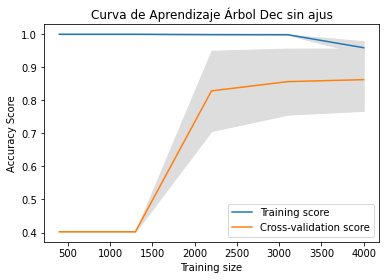

In [117]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje Árbol Dec sin ajus')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

**Curva de aprendizaje utilizando Gradient Boosting Tree**

In [118]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(GradientBoostingClassifier(),x,y,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

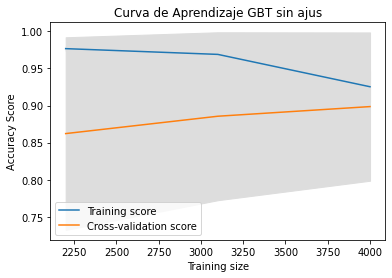

In [119]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje GBT sin ajus')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

**Análisis e interpretación de las gráficas de curvas de aprendizaje**

Se pudo observar que en casi todas las gráficas hay una tendencia al sobreajuste o *overfitting*, esto significa que en los modelos que se graficaron, las muestras pueden ser memorizadas por dichos algoritmos, y esto es lo que precisamente se debe evitar, porque lo que se pretende no es que el algoritmo de Machine Learning se aprenda el comportamiento de las muestras muy bien, sino que tenga una buena capacidad de entrenamiento y tenga la capacidad de generalizar o de predecir las nuevas muestras que se ingresan. En todas las curvas se evidencia que el error de entrenamiento (Training score) es más grande que el error de validación, y también en algunas como la del clasificador de red neuronal hay una convergencia de las dos curvas, lo que  puede ser beneficioso para el problema.

Por esta razón se deben ajustar los parámetros de los algoritmos y disminuir la complejidad de los mismos, así como también, como en el caso de la máquina de vectores de soporte hay que ajustar el parámetro de regularización para que el modelo no se sobreajuste, esto es a lo que se le conoce como ajuste de hiperparámetros que se verá en la siguiente sección que es la de la Elección del modelo de clasificación.

# **3. Elección del modelo de clasificación**
Despues de haber realizado un preprocesamiento y una respectiva exploración de los datos se procede a dar un intento de solución al problema de clasificación con los distintos modelos que existen. 

In [120]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              5000 non-null   float64
 1   word_freq_address           5000 non-null   float64
 2   word_freq_all               5000 non-null   float64
 3   word_freq_3d                5000 non-null   float64
 4   word_freq_our               5000 non-null   float64
 5   word_freq_over              5000 non-null   float64
 6   word_freq_remove            5000 non-null   float64
 7   word_freq_internet          5000 non-null   float64
 8   word_freq_order             5000 non-null   float64
 9   word_freq_mail              5000 non-null   float64
 10  word_freq_receive           5000 non-null   float64
 11  word_freq_will              5000 non-null   float64
 12  word_freq_people            5000 non-null   float64
 13  word_freq_report            5000 

In [121]:
final_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_!_Baja,char_freq_!_Media,char_freq_!_Alta,char_freq_$_Baja,char_freq_$_Media,char_freq_$_Alta,char_freq_#_Baja,char_freq_#_Media,char_freq_#_Alta,spam
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.096210,0.196016,0.25826,0.060204,0.316834,0.100666,0.105094,0.096892,0.082880,0.324208,...,0.91980,0.08000,0.000200,0.999200,0.000200,0.00060,0.919200,0.080400,0.000400,0.402400
std,0.294285,1.239345,0.48955,1.338433,0.645306,0.263176,0.376768,0.385790,0.268378,0.682244,...,0.27163,0.27132,0.014142,0.028276,0.014142,0.02449,0.272555,0.271939,0.019998,0.490431
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.00000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.00000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.37000,0.000000,0.370000,0.100000,0.000000,0.000000,0.000000,0.410000,...,1.00000,0.00000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000
max,4.540000,14.280000,5.10000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


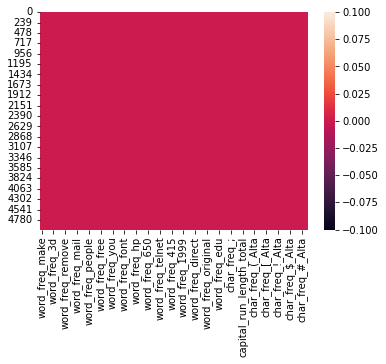

In [122]:
sns.heatmap(final_data.isnull())

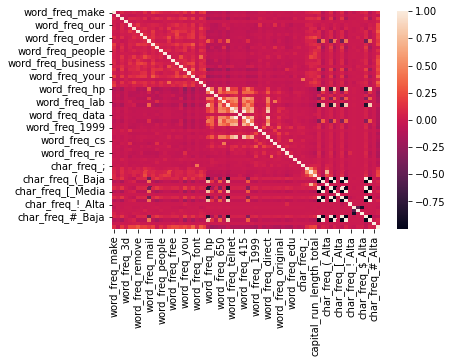

In [123]:
#Matriz de correlación
sns.heatmap(final_data.corr())

In [124]:
from sklearn.model_selection import train_test_split

A partir del dataset obtenido se busca obtener una parte para un set de entrenamiento y otra parte como set de prueba. 70% y 30% respectivamente

In [125]:
data_train, data_test= train_test_split(final_data, train_size=0.7, random_state=1)
data_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_!_Baja,char_freq_!_Media,char_freq_!_Alta,char_freq_$_Baja,char_freq_$_Media,char_freq_$_Alta,char_freq_#_Baja,char_freq_#_Media,char_freq_#_Alta,spam
1334,0.00,0.0,0.00,0.0,0.00,0.000,0.0,0.0,0.0,3.770,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4768,0.00,0.0,0.00,0.0,0.37,0.156,0.0,0.0,0.0,1.302,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
65,0.66,0.0,0.66,0.0,0.00,0.000,0.0,0.0,0.0,0.660,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
177,0.44,0.0,0.00,0.0,0.89,0.000,0.0,0.0,0.0,0.440,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4489,0.35,0.0,0.71,0.0,0.00,0.000,0.0,0.0,0.0,0.350,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [126]:
X_train = data_train.drop(['spam'],axis=1)
y_train = data_train['spam']

X_test = data_test.drop(['spam'], axis = 1)
y_test = data_test['spam']

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **3. MODELOS SUPERVISADOS**

Debido a que el problema que se está resolviendo es un problema de tipo supervisado, ya que existe el conjunto de datos de entrada 'X' y las etiquetas de salida 'y', y apriori se sabe cuál debe ser la salida de cada muestra, se entrenan modelos o métodos supervisados.

## **3.1 Random Forest o Bosque Aleatorio**

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [129]:
def RandomForest(n_ests,max_depths,X_train,y_train,X_test,y_test):
  
  resultados = pd.DataFrame()
  resultados_mc = pd.DataFrame()
  idx = 0
  idx1 = 0
  for n_est in n_ests:
    for max_depth in max_depths:
        model = RandomForestClassifier(n_estimators=n_est,max_depth=max_depth)
        model = model.fit(X_train,y_train)
        y_est_train = model.predict(X_train)
        y_est_test = model.predict(X_test)
        error_train = accuracy_score(y_train,y_est_train)
        error_test = accuracy_score(y_test,y_est_test)
        f1 = f1_score(y_test, y_est_test)
        conf_matrix = confusion_matrix(y_test, y_est_test,normalize='all').ravel()

        resultados.loc[idx,'Árboles'] = n_est
        resultados.loc[idx,'Max_Prof'] = max_depth
        resultados.loc[idx,'Error_train'] = error_train
        resultados.loc[idx,'Error_test'] = error_test
        resultados.loc[idx,'F1'] = f1

        resultados_mc.loc[idx1,'T_N'] = conf_matrix[0]  # True Negative (negativos)
        resultados_mc.loc[idx1,'F_P'] = conf_matrix[1]  # False Positive (falsos positivos)
        resultados_mc.loc[idx1,'F_N'] = conf_matrix[2]  # False Negative (falsos negativos)
        resultados_mc.loc[idx1,'T_P'] = conf_matrix[3]  # True Positive (positivos)

        idx = idx + 1
        idx1 = idx1 + 1

  return pd.concat([resultados,resultados_mc],axis=1)

In [130]:
RandomForest([5,10,20],[7,10,15],X_train,y_train,X_test,y_test)

,Árboles,Max_Prof,Error_train,Error_test,F1,T_N,F_P,F_N,T_P
0,5.0,7.0,0.892000,0.881333,0.855987,0.528667,0.057333,0.061333,0.352667
1,5.0,10.0,0.915143,0.883333,0.848222,0.557333,0.028667,0.088000,0.326000
2,5.0,15.0,0.935143,0.897333,0.879499,0.522667,0.063333,0.039333,0.374667
3,10.0,7.0,0.902286,0.885333,0.848858,0.563333,0.022667,0.092000,0.322000
4,10.0,10.0,0.916571,0.886000,0.850915,0.560667,0.025333,0.088667,0.325333
5,10.0,15.0,0.944000,0.906000,0.880204,0.560667,0.025333,0.068667,0.345333
6,20.0,7.0,0.901714,0.892000,0.858144,0.565333,0.020667,0.087333,0.326667
7,20.0,10.0,0.922286,0.900667,0.870996,0.565333,0.020667,0.078667,0.335333
8,20.0,15.0,0.944286,0.906000,0.878970,0.564667,0.021333,0.072667,0.341333


**Elección de los mejores hiperparámetros**

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
# selección de los mejores paramétros del modelo
param_grid = {'n_estimators':[5,10,20],'max_depth':[7,10,15]}
clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy')
clf = clf.fit(X_train,y_train)
mejores_parametros = clf.best_params_
score = clf.best_score_

print("Los mejores hiperparametros son:" +str(mejores_parametros))
print("El mejor score es:" +str(score))

Los mejores hiperparametros son:{'max_depth': 15, 'n_estimators': 20}
El mejor score es:0.9028571428571428


## **3.2 Máquina de Vectores de Soporte (Kernel polinomial)**

In [133]:
from sklearn.svm import SVC

In [134]:
def SupportMachine(reg_params,degrees,X_train,y_train,X_test,y_test):

  resultados = pd.DataFrame()
  resultados_mc = pd.DataFrame()
  idx = 0
  idx1 = 0

  for reg_param in reg_params:
    for degree in degrees:
        model = SVC(C=reg_param,kernel='poly',degree=degree)
        model = model.fit(X_train,y_train)
        y_est_train = model.predict(X_train)
        y_est_test = model.predict(X_test)
        error_train = accuracy_score(y_train,y_est_train)
        error_test = accuracy_score(y_test,y_est_test)
        f1 = f1_score(y_test,y_est_test)
        conf_matrix = confusion_matrix(y_test,y_est_test,normalize='all').ravel()

        resultados.loc[idx,'Reg'] = reg_param
        resultados.loc[idx,'Degree'] = degree
        resultados.loc[idx,'Error_train'] = error_train
        resultados.loc[idx,'Error_test'] = error_test
        resultados.loc[idx,'F1'] = f1

        resultados_mc.loc[idx1,'T_N'] = conf_matrix[0]  # True Negative (negativos)
        resultados_mc.loc[idx1,'F_P'] = conf_matrix[1]  # False Positive (falsos positivos)
        resultados_mc.loc[idx1,'F_N'] = conf_matrix[2]  # False Negative (falsos negativos)
        resultados_mc.loc[idx1,'T_P'] = conf_matrix[3]  # True Positive (positivos)

        idx = idx + 1
        idx1 = idx1 + 1

  return pd.concat([resultados,resultados_mc],axis=1)

In [135]:
SupportMachine([0.05,1.5,9.6],[1,3,4],X_train,y_train,X_test,y_test)

,Reg,Degree,Error_train,Error_test,F1,T_N,F_P,F_N,T_P
0,0.05,1.0,0.835143,0.826667,0.753788,0.561333,0.024667,0.148667,0.265333
1,0.05,3.0,0.660571,0.630667,0.201729,0.584000,0.002000,0.367333,0.046667
2,0.05,4.0,0.649143,0.620667,0.162003,0.584000,0.002000,0.377333,0.036667
3,1.50,1.0,0.882286,0.876667,0.838145,0.557333,0.028667,0.094667,0.319333
4,1.50,3.0,0.778000,0.741333,0.559091,0.577333,0.008667,0.250000,0.164000
5,1.50,4.0,0.729143,0.675333,0.382763,0.574667,0.011333,0.313333,0.100667
6,9.60,1.0,0.888286,0.872667,0.834632,0.551333,0.034667,0.092667,0.321333
7,9.60,3.0,0.851429,0.809333,0.717949,0.566667,0.019333,0.171333,0.242667
8,9.60,4.0,0.787429,0.732667,0.548931,0.570000,0.016000,0.251333,0.162667


**Elección del mejor modelo con los mejores hiperparámetros**

In [136]:
# selección de los mejores paramétros del modelo
param_grid = {'C':[0.05,1.5,9.6],'degree':[1,3,4]}
clf = GridSearchCV(SVC(kernel='poly'), param_grid, scoring='accuracy')
clf = clf.fit(X_train,y_train)
mejores_parametros = clf.best_params_
score = clf.best_score_

print("Los mejores hiperparametros son:" +str(mejores_parametros))
print("El mejor score es:" +str(score))

Los mejores hiperparametros son:{'C': 9.6, 'degree': 1}
El mejor score es:0.8817142857142857


## **3.3 Máquina de Vectores de Soporte (Kernel RBF)**

In [137]:
def SupportMachine(reg_params,gammas,X_train,y_train,X_test,y_test):

  resultados = pd.DataFrame()
  resultados_mc = pd.DataFrame()
  idx = 0
  idx1 = 0

  for reg_param in reg_params:
    for gamma in gammas:
        model = SVC(C=reg_param,kernel='rbf',gamma=gamma)
        model = model.fit(X_train,y_train)
        y_est_train = model.predict(X_train)
        y_est_test = model.predict(X_test)
        error_train = accuracy_score(y_train,y_est_train)
        error_test = accuracy_score(y_test,y_est_test)
        f1 = f1_score(y_test,y_est_test)
        conf_matrix = confusion_matrix(y_test,y_est_test,normalize='all').ravel()

        resultados.loc[idx,'Reg'] = reg_param
        resultados.loc[idx,'Gamma'] = gamma
        resultados.loc[idx,'Error_train'] = error_train
        resultados.loc[idx,'Error_test'] = error_test
        resultados.loc[idx,'F1'] = f1

        resultados_mc.loc[idx1,'T_N'] = conf_matrix[0]  # True Negative (negativos)
        resultados_mc.loc[idx1,'F_P'] = conf_matrix[1]  # False Positive (falsos positivos)
        resultados_mc.loc[idx1,'F_N'] = conf_matrix[2]  # False Negative (falsos negativos)
        resultados_mc.loc[idx1,'T_P'] = conf_matrix[3]  # True Positive (positivos)

        idx = idx + 1
        idx1 = idx1 + 1

  return pd.concat([resultados,resultados_mc],axis=1)

In [138]:
SupportMachine([0.05,1.5,9.6],[0.1,0.7,4.5],X_train,y_train,X_test,y_test)

,Reg,Gamma,Error_train,Error_test,F1,T_N,F_P,F_N,T_P
0,0.05,0.1,0.739143,0.726000,0.519298,0.578000,0.008000,0.266000,0.148000
1,0.05,0.7,0.602571,0.586000,0.000000,0.586000,0.000000,0.414000,0.000000
2,0.05,4.5,0.602571,0.586000,0.000000,0.586000,0.000000,0.414000,0.000000
3,1.50,0.1,0.931714,0.874667,0.832442,0.563333,0.022667,0.102667,0.311333
4,1.50,0.7,0.950286,0.767333,0.612653,0.583333,0.002667,0.230000,0.184000
5,1.50,4.5,0.953429,0.729333,0.525701,0.579333,0.006667,0.264000,0.150000
6,9.60,0.1,0.945714,0.872000,0.830088,0.559333,0.026667,0.101333,0.312667
7,9.60,0.7,0.952857,0.764000,0.611842,0.578000,0.008000,0.228000,0.186000
8,9.60,4.5,0.954286,0.729333,0.525701,0.579333,0.006667,0.264000,0.150000


**Elección del mejor modelo con los mejores hiperparámetros**

In [139]:
# selección de los mejores paramétros del modelo
param_grid = {'C':[0.05,1.5,9.6],'gamma':[0.1,0.7,4.5]}
clf = GridSearchCV(SVC(kernel='rbf'), param_grid, scoring='accuracy')
clf = clf.fit(X_train,y_train)
mejores_parametros = clf.best_params_
score = clf.best_score_

print("Los mejores hiperparametros son:" +str(mejores_parametros))
print("El mejor score es:" +str(score))

Los mejores hiperparametros son:{'C': 9.6, 'gamma': 0.1}
El mejor score es:0.8642857142857142


## **3.4 Red Neuronal**

In [140]:
from sklearn.neural_network import MLPClassifier

In [141]:
def MLPC(num_hidden_layers,num_neurons,X_train,y_train,X_test,y_test):

  resultados = pd.DataFrame()
  resultados_mc = pd.DataFrame()
  idx = 0
  idx1 = 0

  for hidden_layers in num_hidden_layers:
    for neurons in num_neurons:
      hidden_layers_sizes = tuple(hidden_layers*[neurons])
      MLP = MLPClassifier(hidden_layer_sizes=hidden_layers_sizes, activation='tanh', max_iter=100, random_state=1)
      MLP = MLP.fit(X_train, y_train)
      y_est_train = MLP.predict(X_train)
      y_est_test = MLP.predict(X_test)
      error_train = accuracy_score(y_train, y_est_train)
      error_test = accuracy_score(y_test,y_est_test)
      f1 = f1_score(y_test, y_est_test)
      conf_matrix = confusion_matrix(y_test,y_est_test,normalize='all').ravel()

      resultados.loc[idx,'Capas Ocultas'] = hidden_layers
      resultados.loc[idx,'Neuronas'] = neurons
      resultados.loc[idx,'Error Ent'] = error_train
      resultados.loc[idx,'Error test'] = error_test
      resultados.loc[idx,'F1'] = f1
      
      resultados_mc.loc[idx1,'T_N'] = conf_matrix[0]  # True Negative (negativos)
      resultados_mc.loc[idx1,'F_P'] = conf_matrix[1]  # False Positive (falsos positivos)
      resultados_mc.loc[idx1,'F_N'] = conf_matrix[2]  # False Negative (falsos negativos)
      resultados_mc.loc[idx1,'T_P'] = conf_matrix[3]  # True Positive (positivos)

      idx = idx + 1
      idx1 = idx1 + 1

  return pd.concat([resultados,resultados_mc],axis=1)

In [142]:
MLPC([1],[5,7,9],X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,Capas Ocultas,Neuronas,Error Ent,Error test,F1,T_N,F_P,F_N,T_P
0,1.0,5.0,0.900286,0.885333,0.854237,0.549333,0.036667,0.078,0.336
1,1.0,7.0,0.904000,0.888667,0.858594,0.550667,0.035333,0.076,0.338
2,1.0,9.0,0.902000,0.892000,0.875000,0.514000,0.072000,0.036,0.378


**Elección del mejor modelo con los mejores hiperparámetros con 1 capa oculta**

In [143]:
# selección de los mejores paramétros del modelo
param_grid = {'hidden_layer_sizes':[(5,),(7,),(9,)]}
clf = GridSearchCV(MLPClassifier(activation='tanh',max_iter=100,random_state=1), param_grid, scoring='accuracy')
clf = clf.fit(X_train,y_train)
mejores_parametros = clf.best_params_
score = clf.best_score_

print("Los mejores hiperparametros son:" +str(mejores_parametros))
print("El mejor score es:" +str(score))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Los mejores hiperparametros son:{'hidden_layer_sizes': (5,)}
El mejor score es:0.8882857142857142


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## **3.5 Decision Tree o Árbol de Decisión**

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
def DecTree(max_depths,max_features,X_train,y_train,X_test,y_test):

  resultados = pd.DataFrame()
  resultados_mc = pd.DataFrame()
  idx = 0
  idx1 = 0

  for max_depth in max_depths:           # máxima profundidad del árbol
    for max_feature in max_features:     # número máximo de características para la mejor división 
      DTC = DecisionTreeClassifier(max_depth=max_depth,max_features=max_feature,random_state=1)
      DTC = DTC.fit(X_train,y_train)
      y_est_train = DTC.predict(X_train)
      y_est_test = DTC.predict(X_test)
      error_train = accuracy_score(y_train,y_est_train)
      error_test = accuracy_score(y_test,y_est_test)
      f1 = f1_score(y_test,y_est_test)
      conf_matrix = confusion_matrix(y_test,y_est_test,normalize='all').ravel()

      resultados.loc[idx,'Max_Prof'] = max_depth
      resultados.loc[idx,'Max_Car'] = max_feature
      resultados.loc[idx,'Error_train'] = error_train
      resultados.loc[idx,'Error_test'] = error_test
      resultados.loc[idx,'F1'] = f1

      resultados_mc.loc[idx1,'T_N'] = conf_matrix[0]  # True Negative (negativos)
      resultados_mc.loc[idx1,'F_P'] = conf_matrix[1]  # False Positive (falsos positivos)
      resultados_mc.loc[idx1,'F_N'] = conf_matrix[2]  # False Negative (falsos negativos)
      resultados_mc.loc[idx1,'T_P'] = conf_matrix[3]  # True Positive (positivos)

      idx = idx + 1
      idx1 = idx1 + 1

  return pd.concat([resultados,resultados_mc],axis=1)

In [146]:
DecTree([3,4,8],[5,9,10],X_train,y_train,X_test,y_test)

,Max_Prof,Max_Car,Error_train,Error_test,F1,T_N,F_P,F_N,T_P
0,3.0,5.0,0.766571,0.760000,0.737991,0.422000,0.164000,0.076000,0.338000
1,3.0,9.0,0.804571,0.802000,0.698477,0.572667,0.013333,0.184667,0.229333
2,3.0,10.0,0.802571,0.795333,0.693918,0.563333,0.022667,0.182000,0.232000
3,4.0,5.0,0.822857,0.808000,0.764706,0.496000,0.090000,0.102000,0.312000
4,4.0,9.0,0.830000,0.821333,0.740310,0.566667,0.019333,0.159333,0.254667
5,4.0,10.0,0.818000,0.817333,0.784591,0.484667,0.101333,0.081333,0.332667
6,8.0,5.0,0.866571,0.835333,0.780444,0.542667,0.043333,0.121333,0.292667
7,8.0,9.0,0.879143,0.867333,0.824670,0.555333,0.030667,0.102000,0.312000
8,8.0,10.0,0.860286,0.833333,0.788494,0.522667,0.063333,0.103333,0.310667


**Elección del mejor modelo con los mejores hiperparámetros**

In [147]:
# selección de los mejores paramétros del modelo
param_grid = {'max_depth':[3,4,8],'max_features':[5,9,10]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, scoring='accuracy')
clf = clf.fit(X_train,y_train)
mejores_parametros = clf.best_params_
score = clf.best_score_

print("Los mejores hiperparametros son:" +str(mejores_parametros))
print("El mejor score es:" +str(score))

Los mejores hiperparametros son:{'max_depth': 8, 'max_features': 9}
El mejor score es:0.8414285714285714


## **3.6 Gradient Boosting Tree**

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

In [149]:
def GraBoosTree(n_trees,depths,X_train,y_train,X_test,y_test):

  resultados = pd.DataFrame()
  resultados_mc = pd.DataFrame()
  idx = 0
  idx1 = 0

  for n_tree in n_trees:        # número de árboles
    for depth in depths:        # máxima profundidad
      GBT = GradientBoostingClassifier(n_estimators=n_tree,max_depth=depth)
      GBT = GBT.fit(X_train,y_train)
      y_est_train = GBT.predict(X_train)
      y_est_test = GBT.predict(X_test)
      error_train = accuracy_score(y_train,y_est_train)
      error_test = accuracy_score(y_test,y_est_test)
      f1 = f1_score(y_test,y_est_test)
      conf_matrix = confusion_matrix(y_test,y_est_test,normalize='all').ravel()

      resultados.loc[idx,'Estiimadores'] = n_tree
      resultados.loc[idx,'Max_Prof'] = depth
      resultados.loc[idx,'Err_train'] = error_train
      resultados.loc[idx,'Err_test'] = error_test
      resultados.loc[idx,'F1'] = f1

      resultados_mc.loc[idx1,'T_N'] = conf_matrix[0]  # True Negative (negativos)
      resultados_mc.loc[idx1,'F_P'] = conf_matrix[1]  # False Positive (falsos positivos)
      resultados_mc.loc[idx1,'F_N'] = conf_matrix[2]  # False Negative (falsos negativos)
      resultados_mc.loc[idx1,'T_P'] = conf_matrix[3]  # True Positive (positivos)

      idx = idx + 1
      idx1 = idx1 + 1

  return pd.concat([resultados,resultados_mc],axis=1)

In [150]:
GraBoosTree([3,5,7],[5,6,8],X_train,y_train,X_test,y_test)

,Estiimadores,Max_Prof,Err_train,Err_test,F1,T_N,F_P,F_N,T_P
0,3.0,5.0,0.839143,0.833333,0.758221,0.572000,0.014000,0.152667,0.261333
1,3.0,6.0,0.869143,0.858667,0.801498,0.573333,0.012667,0.128667,0.285333
2,3.0,8.0,0.890571,0.853333,0.798535,0.562667,0.023333,0.123333,0.290667
3,5.0,5.0,0.867714,0.858000,0.801120,0.572000,0.014000,0.128000,0.286000
4,5.0,6.0,0.883143,0.870000,0.822888,0.568000,0.018000,0.112000,0.302000
5,5.0,8.0,0.898857,0.868667,0.825200,0.558667,0.027333,0.104000,0.310000
6,7.0,5.0,0.879429,0.868667,0.819100,0.571333,0.014667,0.116667,0.297333
7,7.0,6.0,0.895429,0.879333,0.837376,0.568667,0.017333,0.103333,0.310667
8,7.0,8.0,0.910286,0.877333,0.838028,0.560000,0.026000,0.096667,0.317333


**Elección del mejor modelo con los mejores hiperparámetros**

In [151]:
# selección de los mejores paramétros del modelo
param_grid = {'n_estimators':[3,5,7],'max_depth':[5,6,8]}
clf = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='accuracy')
clf = clf.fit(X_train,y_train)
mejores_parametros = clf.best_params_
score = clf.best_score_

print("Los mejores hiperparametros son:" +str(mejores_parametros))
print("El mejor score es:" +str(score))

Los mejores hiperparametros son:{'max_depth': 8, 'n_estimators': 7}
El mejor score es:0.876


**Curvas de Aprendizaje de los mejores modelos**

Luego de haber seleccionado los mejores modelos para cada uno de los clasificadores: Random Forest, Máquina de Vectores de Soporte con kernel polinomial y rbf, red neuronal con perceptrón multicapa, Árbol de decisión y Gradient Boosting Tree, se realizan las gráficas como sigue:

In [152]:
xf, yf = final_data.iloc[:,0:67], final_data.iloc[:,67]

**Random Forest**

In [153]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(max_depth=15,n_estimators=20),xf,yf,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

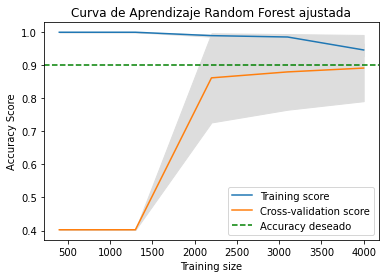

In [154]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje Random Forest ajustada')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.axhline(y=0.9,c='green',ls='--',label='Accuracy deseado')
plt.legend()

**Máquina de vectores de soporte, kernel polinomial**

In [155]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(SVC(C=9.6,degree=1,kernel='poly'),xf,yf,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

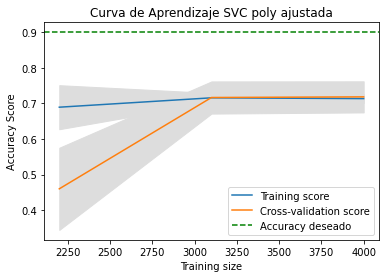

In [156]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje SVC poly ajustada')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.axhline(y=0.9,c='green',ls='--',label='Accuracy deseado')
plt.legend()

**Máquina de vectores de soporte, kernel rbf**

In [157]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(SVC(C=9.6,gamma=0.1,kernel='rbf'),xf,yf,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

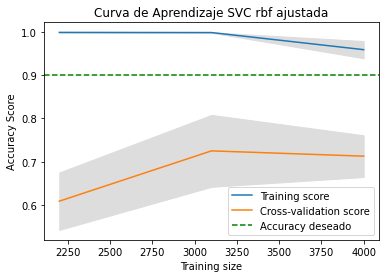

In [158]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje SVC rbf ajustada')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.axhline(y=0.9,c='green',ls='--',label='Accuracy deseado')
plt.legend()

**Red Neuronal**

In [159]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(hidden_layer_sizes=(7,),activation='tanh',max_iter=100,random_state=1),xf,yf,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

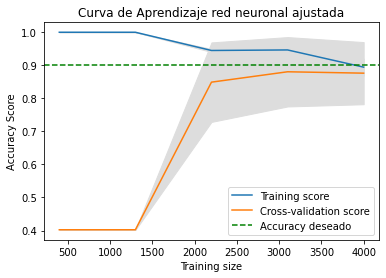

In [160]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje red neuronal ajustada')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.axhline(y=0.9,c='green',ls='--',label='Accuracy deseado')
plt.legend()

**Decision Tree**

In [161]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=8,max_features=9,random_state=1),xf,yf,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

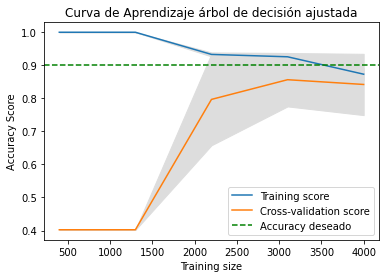

In [162]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje árbol de decisión ajustada')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.axhline(y=0.9,c='green',ls='--',label='Accuracy deseado')
plt.legend()

**Gradient Boosting Tree**

In [163]:
# Crear la curva de aprendizaje para varios tamaños de conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(GradientBoostingClassifier(max_depth=8,n_estimators=7),xf,yf,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,5))
# Medias y desviaciones estándar para los score del conjunto de entrenamiento
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
# Medias y desviaciones estándar para los score del conjunto de prueba
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

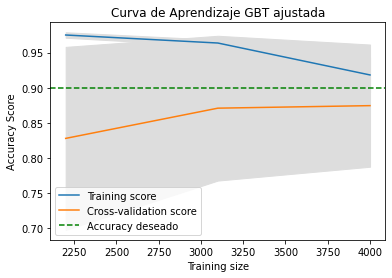

In [164]:
plt.plot(train_sizes,train_mean,label='Training score')
plt.plot(train_sizes,test_mean,label='Cross-validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Curva de Aprendizaje GBT ajustada')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.axhline(y=0.9,c='green',ls='--',label='Accuracy deseado')
plt.legend()

**Interpretación de las curvas de aprendizaje de los modelos ajustado**

Teniendo en cuenta la métrica que se evalúa en el conjunto de datos que es el Accuracy y que se desea tener un valor del mismo de 0.90 (90%) en la exactitud que los modelos arrojaron para las diferentes iteraciones hechas anteriormente, de las curvas de aprendizaje se puede analizar lo siguiente:

*   Random Forest: La curva de aprendiza tiene una tendencia a tener un buen equilibrio entre el sesgo (bias) y la varianza (variance), ya que se puede observar que ambas curvas, de entrenamiento y validación tienen la tendencia hacia el accuracy deseado. Si se aumenta la cantidad de muestras o instancias el accuracy de validación tiende a aumentar y el de entrenamiento tiende a disminuir, esto es que a medida que aumenta el número de muestras el modelo pierde capacidad de entrenamiento y gana capacidad de generalización ante muestras nuevas.
*   Máquina de vectores de soporte con kernel polinomial: En la gráfica se puede ver que ambas curvas están lejanas de la métrica que se desea, esto significa que existe un alto sesgo en los datos, lo que quiere decir que puede haber una inclinación de los datos hacia una clase u otra dependiendo del número de muestras en cada una. Puede haber problmas de sobreajuste.
*   Máquina de vectores de soporte con kernel rbf: Se observa que la curva de entrenamiento tiene la tendencia de ir decreciendo y que la curva de validación va decreciendo muy lentamente, lo que significa que el modelo va perdiendo capacidad para generalizar o precir muestras nuevas y así como también a medida que va cayendo la curva de entramiento respecto a la cantidad de muestras en el conjunto de entrenamiento, cae la capacidad de entrenar las muestras. Este modelo presenta una alta varianza en los datos.
*   Red Neuronal: En la gráfica se puede observar que este modelo presenta una alta tendencia a tener un buen balance entre el sesgo y la varianza, porque ambas curvas se acercan cada vez más a el valor deseado de la métrica de evaluación. A medida que se hace más grande la cantidad de muestras la capacidad de generalización del modelo tiene un muy leve decrecimiento y se puede decir que puede llegar un punto en que se mantenga constante y la capacidad de el entrenamiento de los datos va disminuyendo. Es un buen modelo, hay un buen acercamiento al valor deseado.
*   Árbol de Decisión: Este modelo presenta una curva de aprendizaje en la cual se puede observar que la curva de entrenamiento sobrepasa el valor de accuracy deseado, lo que es beneficioso y también significa que a medida que se va incrementando la cantidad de muestras en el conjunto de entrenamiento el modelo va perdiendo capacidad de entrenamiento; con respecto a la curva de validación se puede ver que no está tan cerca del rendimiento deseado y que tiene una leve tendencia a decrecer. Podría llegar a ser un buen modelo. Acá se puede ver el comportamiento de la alta varianza en los datos, la curva de validación se va alejando del valor de desempeño deseado.
*   Gradient Boosting Tree: En esta gráfica se puede apreciar que ambas curvas, la de entrenamiento y de test se acercan a la línea de desempeño deseado, lo que puede ser beneficioso en cierta medida, aunque la curva de validación tiene una tendencia a decrecer de manera leve a medida que se aumneta la cantidad de muestras en el conjunto de entrenamiento del modelo. En este diagrama puede haber alta varianza en los datos, ya que ambas curvas presentan cierta lejanía al accuracy deseado. 











**Modelo no supervisado**

In [165]:
from sklearn.decomposition import PCA

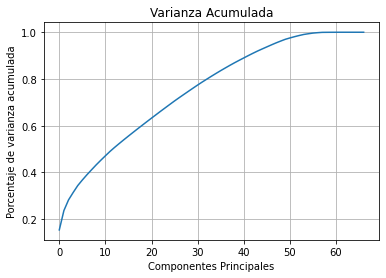

In [166]:
pca_varianza = PCA(n_components=xf.shape[1]).fit(StandardScaler().fit_transform(xf))
plt.plot(np.cumsum(pca_varianza.explained_variance_/np.sum(pca_varianza.explained_variance_)))
plt.title('Varianza Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()

En el análisis por componentes principales (PCA) favorece la optimización del número de variables utilizadas, encontrando una relación entre el porcentaje de varianza acumulada y el número de componentes principales, es decir, cómo el criterio de evaluación es obtener un accuracy cercano al 90%, el número de variables (componentes principales) se puede reducir 

In [167]:
def experimentar_PCA(num_comps, estimator, X_train, y_train, X_test, y_test):

  resultados = pd.DataFrame()
  idx = 0
 
  for num_comp in num_comps:
    pca = PCA(n_components=num_comp)
    x_train_pca = pca.fit_transform(X_train)
    x_test_pca = pca.transform(X_test)
    clf = estimator
    clf.fit(x_train_pca, y_train)
    accuracy = accuracy_score(y_test, clf.predict(x_test_pca))
    n_total = X_train.shape[1]
    f_red = pca.n_components_
    prt = (f_red/n_total)*100

    resultados.loc[idx, 'Variables'] = num_comp     # número de componentes
    resultados.loc[idx, 'Reducción'] = prt          # porcentaje de reducción de variables o características
    resultados.loc[idx, 'Accuracy'] = accuracy
  
    idx+=1

  return resultados

In [170]:
experimentar_PCA([10,20,30,55],RandomForestClassifier(n_estimators=20,max_depth=15), X_train, y_train, X_test, y_test)

,Variables,Reducción,Accuracy
0,10.0,14.925373,0.882667
1,20.0,29.850746,0.880667
2,30.0,44.776119,0.886667
3,55.0,82.089552,0.897333
